Here's what this code does in detail:

What is the Boston Housing Dataset?
The Boston Housing dataset is a famous dataset from the 1970s that provides data for housing prices in the Boston suburbs. It contains:

13 features describing various attributes of the houses (e.g., crime rate, number of rooms, distance to employment centers, etc.)
1 target variable which is the median value of owner-occupied homes in thousands of dollars.

# Importing the Dataset

In [1]:
from tensorflow.keras.datasets import boston_housing

This line of code imports the Boston Housing dataset from the **tensorflow.keras.datasets** module, which contains many built-in datasets for training and testing machine learning models.

# Loading the Dataset

After importing, you typically load the dataset as follows:

In [2]:
# Load the dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


-   **train_data**: Training data with features.
-   **train_targets**: Corresponding prices (target values) for the training set.
-   **test_data**: Testing data with features.
-   **test_targets**: Corresponding prices (target values) for the testing set.

    -   The dataset is split into training and test sets so that you can train your model on one part of the data and evaluate it on a separate part to check its generalization performance.

In [3]:
# Print dataset shapes
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (404, 13)
Test data shape: (102, 13)


This will load the Boston Housing dataset and print out the shape of the training and test sets. You can then use this dataset to train models for regression tasks, where the goal is to predict housing prices based on the features.

---

   The code provided is calculating the mean and standard deviation for the training data in the Boston Housing dataset. These statistical metrics are often used to normalize or standardize data before training machine learning models. Here's a detailed breakdown:

In [4]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

1. train_data.mean(axis=0):

    -   This line computes the mean of the training data along the columns (features).
    -   axis=0 means that the operation is applied across the rows, meaning the mean is computed for each feature (column) in the training dataset.
    -   The result is a 1D array where each element is the mean of one feature.

2.  train_data.std(axis=0):

    -   This line computes the standard deviation of the training data for each feature.
    -   The standard deviation gives a measure of the spread or dispersion of the data points from the mean for each feature.
    -   Like the mean, this is computed across the rows for each feature, resulting in a 1D array where each element is the standard deviation of one feature.

**Why Compute Mean and Standard Deviation?**
-   In machine learning, especially with datasets like the Boston Housing dataset, features often have very different scales. For instance, one feature might represent a number of rooms (which could range from 3 to 10), while another might represent distance to employment centers (which could range from 1 to 30). These different scales can make it harder for many models to converge during training.

-   To address this, we often standardize the data by:

    -   Subtracting the mean from each feature, so it becomes centered around 0.
    -   Dividing by the standard deviation, so each feature has a standard deviation of 1.
    
This process helps many machine learning algorithms perform better by ensuring that each feature contributes equally to the model's learning process.

This step will ensure that all features have a mean of 0 and a standard deviation of 1, making the data more suitable for training models like neural networks, linear regression, or other algorithms that are sensitive to the scale of input features.

**Summary**

-   Mean: Helps center the data around 0.
-   Standard deviation: Scales the data so that each feature has the same importance.
-   Normalization: Ensures the data is scaled consistently across features, improving model performance.

   This line of code is performing normalization of the test data using the mean and standard deviation calculated from the training set. Here's an explanation of the code and the reasoning behind it:

In [5]:
test_data = (test_data - mean) / std

-   test_data: This is the dataset that will be used to evaluate the performance of the trained model. It's separate from the training data to ensure the model is tested on unseen data.
-   mean: This is the mean of each feature in the training data, calculated earlier.
-   std: This is the standard deviation of each feature in the training data, also calculated earlier.

**Why Normalize Test Data Using Training Statistics?**

-   Training data statistics (mean and standard deviation) are used for normalizing both the training and test data. This ensures consistency, as the test data should be transformed in the same way as the training data for accurate evaluation.
-   Do not use test data statistics: Using the mean and standard deviation of the test data directly would leak information about the test set into the model, leading to over-optimistic results. To properly evaluate the model's generalization, the test data must remain unseen during the training process, and it should be normalized using only the statistics from the training data.

**Normalization Process:**
-   Subtract the mean: Each feature in the test data is shifted so that it has the same mean (calculated from the training set) as the training data, which helps center the data around zero.
-   Divide by the standard deviation: This step scales each feature in the test data so that the spread or variability matches that of the training data, ensuring that all features are on the same scale.

By following this approach, you ensure that both the training and test sets are on the same scale, which helps the model perform well when it's evaluated on unseen data.

---

# models.Sequential()

 In this step, you're preparing to create a machine learning model using TensorFlow's Keras API by importing the necessary modules for building and configuring a neural network. Here's a detailed breakdown of what you're doing and how to proceed.

In [6]:
# Model creation using TensorFlow Keras
from tensorflow.keras import models, layers

-   **models**: This module is used to create and configure models. You can define your neural network architecture, including how layers are connected, the input and output, and how to compile the model.

-   **layers**: This module contains various types of layers that you can use to build your neural network. Common examples include Dense, Dropout, Conv2D, etc. Layers are the building blocks of a neural network.

## 1. Initialize the Model

In [7]:
# Build the model
model = models.Sequential()

-   **models.Sequential()**: This initializes a Sequential model, which allows you to stack layers one after another in a linear fashion. It’s the simplest type of model in Keras, suitable for most feed-forward neural networks.

## 2. Adding the First Hidden Layer

In the updated code, you're explicitly adding an input layer using layers.Input. Here's a detailed explanation of the changes:

### 1. Explicit Input Layer:

In [8]:
model.add(layers.Input(shape=(train_data.shape[1],)))

-   **layers.Input()**: This explicitly adds an input layer to the model. It specifies the shape of the input data that the model will accept.
-   **shape=(train_data.shape[1],)**: This specifies that the input data will have a shape equal to the number of features in the dataset. For the Boston Housing dataset, train_data.shape[1] is 13, so this input layer expects data with 13 features.

### 2. First Dense Layer:

In [9]:
model.add(layers.Dense(64, activation='relu'))

-   This is the first fully connected (dense) layer with 64 neurons and ReLU activation.
-   The model will apply the ReLU function to each neuron's output, introducing non-linearity to help the model learn more complex patterns.

**When Should You Use layers.Input?**

Explicit input layers are more commonly used in functional API models or complex architectures with multiple inputs or outputs. In a simple sequential model like this, adding an explicit Input layer is optional, but it can make the code clearer, especially if the model is likely to become more complex later.

**Summary**:

-   **layers.Input(shape=(train_data.shape[1],))**: Explicitly defines the input layer, specifying that the model expects data with 13 features (in the Boston Housing dataset).
-   **layers.Dense(64, activation='relu')**: Adds a fully connected layer with 64 units and ReLU activation, which is the first hidden layer of the model.

**This approach gives you more control over your model architecture, and it’s especially useful when dealing with more sophisticated models.**

## 3. Adding the Second Hidden Layer

In [10]:
model.add(layers.Dense(64, activation='relu'))

-   This adds another fully connected layer with 64 neurons and ReLU activation. This layer will take the outputs from the previous layer as its input.

## 4. Adding the Output Layer

In [11]:
model.add(layers.Dense(1))

-   **layers.Dense(1)**: The output layer has 1 neuron because the model is solving a regression problem, where the goal is to predict a single continuous value (house price). There’s no activation function here because the output should be a continuous number, not a classification or probability.

**Full Explanation of the Model**
-   The model starts with an input layer of 13 features (from the Boston Housing dataset).
-   It has two hidden layers, each with 64 neurons and ReLU activation, allowing the network to learn non-linear relationships between the features and the target.
-   The output layer has one neuron, as it is a regression problem, where the network outputs the predicted house price.

**Summary**

-   This model is structured to handle a regression task (predicting housing prices) using a simple feed-forward neural network with two hidden layers of 64 neurons each. The ReLU activation helps the network learn complex patterns, and the single output neuron provides the final predicted house price.

---

# model.summary()

The **model.summary()** function provides a detailed summary of the model's architecture, showing information about the layers, output shape, number of parameters, and total trainable parameters. This is a great way to inspect the model before training to ensure everything is set up correctly.

Here’s what happens when you call model.summary():

In [12]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Explanation of Each Section:

-   **Layer (type)**:

This column lists each layer in your model and its type (in this case, Dense for fully connected layers).

-**Output Shape**:

This column shows the shape of the output tensor for each layer. The shape is described in terms of batches of data, so the first dimension is usually None (indicating that the model can handle any batch size), and the second dimension corresponds to the number of units in that layer.

**Param**:

This column displays the number of parameters (weights and biases) that the layer has. For a dense layer, the number of parameters is 
    
**calculated as:(input_features×units)+units**

**Where**:

-   **input_features** is the number of inputs to the layer (i.e., the number of neurons in the previous layer).
-   **units** is the number of neurons in the current layer.

**Total Params**:

This shows the total number of trainable parameters (i.e., the weights and biases that the model will adjust during training). 

**Why model.summary() is useful:**

-   It provides a quick and clear overview of the model architecture.
-   It shows the number of parameters, which is important to understand the complexity of the model.
-   It helps to catch issues (like incorrect layer configurations or mismatched input shapes) before starting training.

---

# model.compile()

The line **model.compile(optimizer='adam', loss='mse', metrics=['mae'])** is preparing the model for training by configuring the optimizer, loss function, and metrics to be tracked. Here’s a detailed explanation of each part:

In [13]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'])

## 1. Optimizer: adam

-   **Adam** (Adaptive Moment Estimation) is an optimization algorithm that computes adaptive learning rates for each parameter. It combines the advantages of two other popular optimizers:
    -   **Momentum**: Keeps track of an exponentially decaying average of past gradients to smooth the optimization.
    -   **RMSProp**: Adapts the learning rate based on the recent magnitude of gradients.
-   **Adam** is widely used because it is computationally efficient, has little memory requirements, and works well in practice with little tuning.

## 2. Loss Function: mse (Mean Squared Error)

-   Mean Squared Error (**MSE**) is a common loss function for regression problems, where the goal is to predict a continuous value.
MSE calculates the average of the squared differences between the predicted values and the actual values

## 3. Metrics: mae (Mean Absolute Error)

-   Mean Absolute Error (**MAE**) is a performance metric that measures the average of the absolute differences between the predicted and actual values

**This compiles the model with:**

-   **Adam** optimizer: For efficient gradient-based optimization.
-   **MSE** loss function: To minimize the squared difference between actual and predicted values, perfect for regression.
-   **MAE** metric: To track the average absolute error during training and evaluation.

**Summary**:

-   **optimizer='adam'**: Optimizes the model’s parameters using the Adam algorithm.
-   **loss='mse'**: Minimizes the mean squared error between the predicted and actual values.
-   **metrics=['mae']**: Tracks the mean absolute error, giving a clearer sense of how the model’s predictions differ from actual values.

    -   This is an essential step before training the model. After this, the model is ready to be trained using the **.fit()** function.

---

# model.fit()

The provided code is used to train the model on the training data. Here's an explanation of each part:

In [14]:
# Train the model
history = model.fit(train_data, train_targets, 
                    epochs=100, 
                    batch_size=16, 
                    validation_split=0.2)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2491.3130 - mae: 40.3893 - val_loss: 245.7039 - val_mae: 12.7296
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 233.1046 - mae: 12.3000 - val_loss: 96.4305 - val_mae: 6.3049
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.9572 - mae: 6.4339 - val_loss: 88.4938 - val_mae: 5.8566
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.3907 - mae: 4.9467 - val_loss: 69.9403 - val_mae: 5.9274
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.0772 - mae: 5.2777 - val_loss: 77.2593 - val_mae: 5.4776
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.0558 - mae: 4.8888 - val_loss: 74.3685 - val_mae: 5.3768
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68.3396 - mae: 5.4618 - val_loss: 68.9615 - val_mae: 5.2554
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.8544 - mae: 5.0636 - val_loss: 66.4628 - val_mae: 5.2094
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0

1. Training the Model:

    -   **model.fit()**: This is the method that trains the model on the training data.

2. Arguments Explained:

    -   **train_data**: This is the input data (the features of the Boston Housing dataset). It's the dataset that the model will use to learn.

    -   **train_targets**: This is the target data (the house prices) that the model will try to predict. The model adjusts its parameters (weights and biases) based on the difference between its predictions and these actual values.

    -   **epochs=100**: The number of times the model will go through the entire training dataset. In this case, it will train for 100 epochs. More epochs generally lead to better learning, but too many can cause overfitting.

    -   **batch_size=16**: The number of training examples used in one forward/backward pass of training. Instead of updating the model’s weights after seeing every example, we update them after processing 16 examples. Smaller batch sizes tend to make training more stable, but larger batch sizes can be more efficient.

    -   **validation_split=0.2**: This reserves 20% of the training data to be used as validation data. The model will be trained on the remaining 80%, and after each epoch, it will evaluate its performance on this 20% validation set. This allows you to monitor how well the model generalizes to unseen data and helps prevent overfitting.

3. Training Process:

**When this code runs**:

-   The model will train on 80% of the training data and evaluate itself on the remaining 20% (as the validation set).
-   For each epoch, it updates the weights and biases by going through batches of 16 examples.
-   The model's loss and performance (both on the training data and validation data) are tracked over each epoch.

4. Return Value (history):
-   The **history** object contains the training metrics for each epoch, including the loss and the metrics you specified (**mae** in this case). You can use this **history** object later to visualize the training and validation loss, mean absolute error, and how the model's performance evolves over time.

**Summary**:

-   The **model.fit()** function trains the model for 100 epochs using a batch size of 16.
-   It reserves 20% of the training data for validation.
-   The **history** object tracks the training and validation loss/metrics over time, allowing you to visualize the learning process

---

# model.evaluate()

The code provided is evaluating the model's performance on the test data. Here's a breakdown of each part:

In [15]:
# Evaluate the model on the test data

## 1. Evaluating the Model:

In [16]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 534.8087 - mae: 21.7126 


-   **model.evaluate()**: This method computes the loss and metrics (defined during 
    **model.compile())** for the provided test data. It runs a forward pass through the model with the test data, computes the loss (in this case, Mean Squared Error), and evaluates the chosen metric (Mean Absolute Error).

-   **test_data**: This is the test dataset that the model has never seen during training, used to evaluate its generalization ability.

-   **test_targets**: These are the actual target values (house prices) for the test dataset.

-   Output:

    -   The function returns two values:
        -   **test_mse_score**: The Mean Squared Error on the test data (the default loss function we compiled the model with).
        -   **test_mae_score**: The Mean Absolute Error on the test data, which provides an intuitive sense of the average error between the model's predictions and the actual values.

## 2. Printing the Result:

In [17]:
print(f"Mean Absolute Error on test data: {test_mae_score}")

Mean Absolute Error on test data: 22.0926570892334


This prints out the Mean Absolute Error (MAE) on the test dataset, which is a useful metric to evaluate the model's performance. It gives you an idea of how far off, on average, the model’s predictions are from the actual house prices.

**Summary**:

-   **model.evaluate()** runs the model on the test data and returns the test loss and any additional metrics (in this case, MAE).
-   **Mean Absolute Error** is useful for understanding how much the model’s predictions deviate from the actual target values, providing a tangible measure of the model’s accuracy.

---

# Matplotlib

**The provided Python code is using the matplotlib library to plot the training and validation loss of a machine learning model over a number of training epochs. Here's a detailed breakdown of each part:**

## 1. Importing Matplotlib

In [18]:
import matplotlib.pyplot as plt

This line imports the pyplot module from the matplotlib library, which is used for creating static, animated, and interactive visualizations in Python. The alias plt is commonly used for convenience.

## 2. Extracting Loss Values

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

Here, we assume history is the result of training a machine learning model, possibly with a library like TensorFlow/Keras. The history object contains training metrics, and .history is a dictionary where:

-   'loss' corresponds to the training loss values (the error during training) across each epoch.
-   'val_loss' corresponds to the validation loss values (the error on the validation set) across each epoch.

## 3. Defining the Epoch Range

In [20]:
epochs = range(1, len(loss_values) + 1)

The number of epochs refers to the number of full cycles through the training data during model training. This line defines a range of integers starting from 1 up to the total number of epochs (the length of the loss values array).

## 4. Plotting the Loss Values

~~~
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
~~~

This is where the plotting happens:

-   The first plt.plot() call creates a line plot for the training loss (loss_values). 'bo' means "blue circles" as the marker for the data points.
-   The second plt.plot() call creates a line plot for the validation loss (val_loss_values). 'b' is used here for a solid blue line.
-   The label parameter in both plots provides a legend description for each dataset (training and validation loss).

## 5. Adding Titles and Labels

~~~
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
~~~



These lines set the title of the plot, and label the x-axis (which represents the epochs) and the y-axis (which represents the loss values).

## 6. Adding a Legend

~~~
plt.legend()
~~~

This displays the legend on the plot, using the label values provided earlier for the training and validation loss curves.

## 7. Displaying the Plot

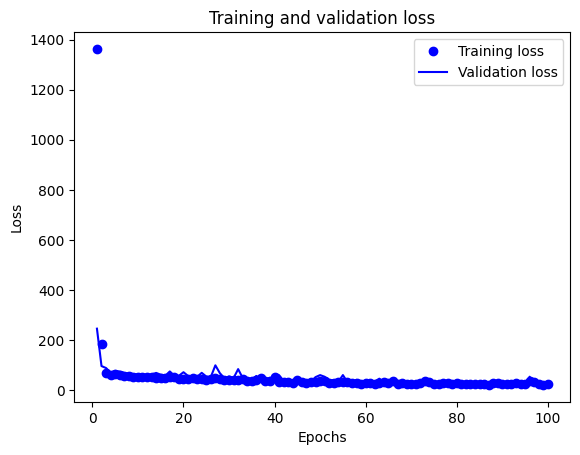

In [21]:
# 4
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

# 5
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# 6
plt.legend()

# 7
plt.show()

This function is used to display the plot. In certain environments, like Jupyter Notebooks, the plot may automatically appear without needing this function. However, in other environments (like some code editors or when running the script from the command line), it is necessary to call plt.show() to actually render and display the plot.

Without this command, the plot might not appear, or the program may finish execution before the plot is rendered. Therefore, it is an essential step to ensure the plot is visible at the end of the script.

**Adding plt.show() at the end ensures the plot will be displayed correctly after all the data has been plotted.**

Output
The resulting plot will show two curves:

-   Training loss (as blue circles along the curve) for each epoch.
-   Validation loss (as a solid blue line) for each epoch.

This plot helps visualize how the model's error (or loss) changes during training and how well the model generalizes (validation loss) across epochs.